In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!pip3 install ktrain

     |████████████████████████████████| 25.2MB 131kB/s 
     |████████████████████████████████| 421.8MB 24kB/s 
     |████████████████████████████████| 6.7MB 39.6MB/s 
     |████████████████████████████████| 983kB 51.4MB/s 
     |████████████████████████████████| 245kB 52.2MB/s 
     |████████████████████████████████| 778kB 48.9MB/s 
     |████████████████████████████████| 471kB 41.2MB/s 
     |████████████████████████████████| 3.9MB 51.1MB/s 
     |████████████████████████████████| 450kB 53.2MB/s 
     |████████████████████████████████| 1.1MB 37.7MB/s 
     |████████████████████████████████| 3.0MB 53.2MB/s 
     |████████████████████████████████| 890kB 55.0MB/s 
  Created wheel for ktrain: filename=ktrain-0.18.3-cp36-none-any.whl size=25252749 sha256=71031252c8a9076a199df02bccf5226836c50d8d11a873984b6417294a4036e5
  Stored in directory: /root/.cache/pip/wheels/21/e3/5b/fb6dc301116865d1a4a0732a7fb91bdbfec1e936c60536826d
  Created wheel for keras-bert: filename=keras_bert-0.85.0-cp36-no

In [ ]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 516.2MB 26kB/s 
     |████████████████████████████████| 3.0MB 40.3MB/s 
     |████████████████████████████████| 460kB 57.9MB/s 
ERROR: ktrain 0.18.3 has requirement tensorflow==2.1.0, but you'll have tensorflow 2.2.0 which is incompatible.
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


In [ ]:
!pip freeze > requirements.txt

In [ ]:
!pip show tensorflow 

Name: tensorflow
Version: 2.2.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras-preprocessing, termcolor, opt-einsum, gast, protobuf, google-pasta, h5py, tensorboard, tensorflow-estimator, astunparse, grpcio, wheel, scipy, absl-py, six, numpy, wrapt
Required-by: ktrain, fancyimpute


### Import k-train library

In [ ]:
import ktrain
from ktrain import text

### Importing content from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Important packages

In [ ]:
import pandas as pd					# data manipulation using dataframes
import numpy as np					# data statistical analysis
import seaborn as sns				# Statistical data visualization
import cv2							# Image and Video processing library

import matplotlib.pyplot as plt		# data visualisation
%matplotlib inline

pd.set_option('display.max_colwidth',1000)

### Importing Dataset

In [ ]:
# MODEL
#BATCH_SIZE  = 32


# TOKENIZER
# The maximum number of words to be used. (most frequent)
MAX_WORDS = 20000
# Max number of words in each complaint.
MAXLEN    = 256

In [ ]:
df = pd.read_csv("/content/drive/My Drive/P1: Twitter Sentiment Analysis/train.txt")
df_test = pd.read_csv("/content/drive/My Drive/P1: Twitter Sentiment Analysis/test_samples.txt")
df.head()

,tweet_id,sentiment,tweet_text
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going to Chapel Hill on Sat. :)
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa and Johnny deal with him on Saturday.
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just hate Nick Diaz. can\u2019t wait for february.
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome can\u2019t deal with their missiles (keep talking like that and we may end up finding out)
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via @PJMedia_com No Barack Obama - Vote Mitt Romney


In [ ]:
df_test.head()

,tweet_id,tweet_text
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor, margate, ocean city area. I'm just waiting for the coordinator to hopefully call me tomorrow"
1,218775148495515649,"Musical awareness: Great Big Beautiful Tomorrow has an ending, Now is the time does not"
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour analyst Shawn Hattingh: Cosatu's role in the context of unrest in the mining http://t.co/46pjzzl6
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susah Susah.usaha Aja blm udh nyerah,inget.if you never try you'll never know.cowok kok gentle bgt"
4,171874368908050432,"Excuse the connectivity of this live stream, from Baba Amr, so many activists using only one Sat Modem. LIVE http://t.co/U283IhZ5 #Homs"


In [ ]:
classes =  list(set(df.sentiment))
classes

['neutral', 'negative', 'positive']

In [ ]:
df = df[['sentiment', 'tweet_text']]
df = pd.get_dummies(df, prefix='', prefix_sep='', columns=['sentiment',])
df.to_csv('df.csv', index=False)
df.head()

,tweet_text,negative,neutral,positive
0,Gas by my house hit $3.39!!!! I\u2019m going to Chapel Hill on Sat. :),0,0,1
1,Theo Walcott is still shit\u002c watch Rafa and Johnny deal with him on Saturday.,1,0,0
2,its not that I\u2019m a GSP fan\u002c i just hate Nick Diaz. can\u2019t wait for february.,1,0,0
3,Iranian general says Israel\u2019s Iron Dome can\u2019t deal with their missiles (keep talking like that and we may end up finding out),1,0,0
4,Tehran\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via @PJMedia_com No Barack Obama - Vote Mitt Romney,0,1,0


### Splitting Dataset

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split( list(df["tweet_text"]), list(df["sentiment"]) , test_size = 0.2, random_state = 42)

### Import Model "distilbert-base-uncased"

In [ ]:
MODEL_NAME = "distilbert-base-uncased"

In [ ]:
t = text.Transformer(MODEL_NAME, maxlen = 180, class_names=classes)

In [ ]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_val, y_val)

preprocessing train...
language: en
train sequence lengths:
	mean : 20
	95percentile : 27
	99percentile : 29


/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:521: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 20
	95percentile : 27
	99percentile : 29


### Model Training

In [ ]:
model = t.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size = 32)

### Tuning LR

In [ ]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
536/536 [==============================] - 255s 476ms/step - loss: 0.0974 - accuracy: 0.9694
Epoch 2/1024
536/536 [==============================] - 258s 481ms/step - loss: 0.5298 - accuracy: 0.7743


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


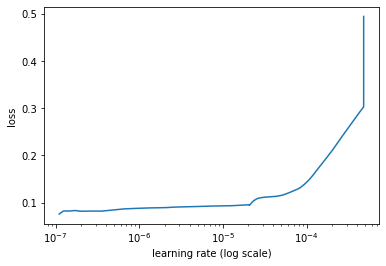

In [ ]:
learner.lr_plot()

In [ ]:
learner.autofit(1e-5,3)



begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/3
537/537 [==============================] - 198s 369ms/step - loss: 0.8406 - accuracy: 0.6017 - val_loss: 0.6878 - val_accuracy: 0.6937
Epoch 2/3
537/537 [==============================] - 197s 367ms/step - loss: 0.6529 - accuracy: 0.7102 - val_loss: 0.6540 - val_accuracy: 0.7046
Epoch 3/3
537/537 [==============================] - 197s 367ms/step - loss: 0.5801 - accuracy: 0.7483 - val_loss: 0.6505 - val_accuracy: 0.7074


In [ ]:
learner.autofit(1e-5,2)



begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/2
537/537 [==============================] - 198s 368ms/step - loss: 0.5167 - accuracy: 0.7841 - val_loss: 0.6537 - val_accuracy: 0.7191
Epoch 2/2
537/537 [==============================] - 198s 368ms/step - loss: 0.4592 - accuracy: 0.8120 - val_loss: 0.6702 - val_accuracy: 0.7198


In [ ]:
learner.autofit(1e-5,1)



begin training using triangular learning rate policy with max lr of 1e-05...
537/537 [==============================] - 197s 368ms/step - loss: 0.3981 - accuracy: 0.8463 - val_loss: 0.7060 - val_accuracy: 0.7135


### Model Prediction

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc = t)

In [ ]:
df_test = pd.read_csv("/content/drive/My Drive/P1: Twitter Sentiment Analysis/test_samples.txt")
df_test["sentiment"] = predictor.predict(df_test["tweet_text"].tolist())
df_test = df_test[['tweet_id', 'sentiment']]
df_test.head()

,tweet_id,sentiment
0,264238274963451904,positive
1,218775148495515649,positive
2,258965201766998017,neutral
3,262926411352903682,positive
4,171874368908050432,negative


### Submit Test File

In [ ]:
df_test.to_csv("/content/drive/My Drive/P1: Twitter Sentiment Analysis/Model/submission_10.csv", index=False)

Test Accuracy = 73.251 %